In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection as skm
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, classification_report

from ISLP import load_data, confusion_table
from ISLP.svm import plot as plot_svm

In [2]:
roc_curve = RocCurveDisplay.from_estimator

## Support vector classifier

### Training data with non-linear separation

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25 + [1]*25)
X[20:30], y[20:30]

(array([[-1.22735205, -0.68322666],
        [-0.07204368, -0.94475162],
        [-0.09826997,  0.09548303],
        [ 0.03558624, -0.50629166],
        [ 0.59374807,  0.89116695],
        [ 0.3208483 , -0.81823023],
        [ 0.73165228, -0.50144002],
        [ 0.87916062, -1.07178742],
        [ 0.9144672 , -0.02006345],
        [-1.24874889, -0.31389947]]),
 array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1]))

In [4]:
X[y==1] += 1
X[20:30]

array([[-1.22735205, -0.68322666],
       [-0.07204368, -0.94475162],
       [-0.09826997,  0.09548303],
       [ 0.03558624, -0.50629166],
       [ 0.59374807,  0.89116695],
       [ 1.3208483 ,  0.18176977],
       [ 1.73165228,  0.49855998],
       [ 1.87916062, -0.07178742],
       [ 1.9144672 ,  0.97993655],
       [-0.24874889,  0.68610053]])

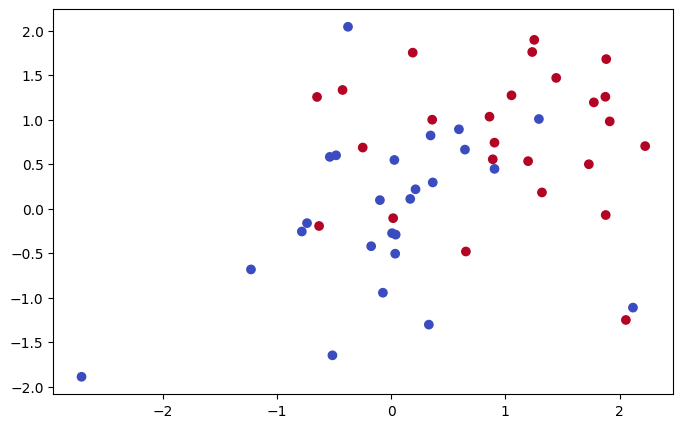

In [5]:
_, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm);

### SVC with C=10

In [6]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

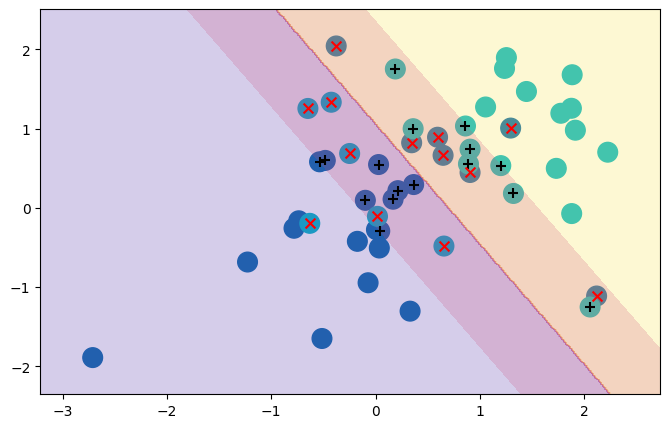

In [7]:
_, ax = plt.subplots(figsize=(8, 5))
plot_svm(X, y, svm_linear, ax=ax);

### SVC with C=.1

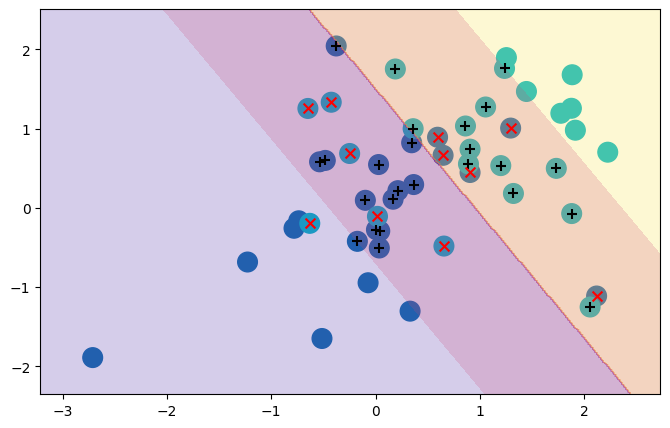

In [8]:
svm_linear_sm = SVC(C=.1, kernel='linear')
svm_linear_sm.fit(X, y)

_, ax = plt.subplots(figsize=(8, 5))
plot_svm(X, y, svm_linear_sm, ax=ax);

In [9]:
svm_linear.coef_, svm_linear_sm.coef_

(array([[1.17303943, 0.77348227]]), array([[0.71529828, 0.45433662]]))

### Tuning on C

In [10]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(
    svm_linear,
    {'C':[0.001,0.01,0.1,1,5,10,100]},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [11]:
grid.cv_results_['mean_test_score']

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

### Test data

In [12]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1
X_test, y_test

(array([[-6.51281012e-01,  8.62444796e-01],
        [-1.25592084e-01,  6.69153241e-01],
        [ 1.21884361e+00,  3.82929583e-01],
        [-8.75721143e-01, -1.51431863e+00],
        [ 1.75338412e+00, -1.11292193e-01],
        [-6.88564948e-01,  1.44257088e-01],
        [-1.91411330e-01,  8.52142264e-01],
        [ 3.39281824e-02,  1.37495836e-02],
        [-7.14579721e-01,  4.69568099e-01],
        [-1.03386672e+00,  6.65889440e-01],
        [ 2.52393751e+00, -5.24686038e-01],
        [-1.46622923e+00,  1.61687876e+00],
        [ 3.54789782e+00, -9.24848872e-04],
        [-2.50695759e-01,  1.58896893e+00],
        [ 1.59278410e-01,  4.93974516e-01],
        [ 6.51882533e-01,  1.53200209e+00],
        [ 5.94697639e-01,  1.27788284e+00],
        [ 8.23466741e-01,  1.55328896e-01],
        [ 6.80173742e-01,  4.96003348e-02],
        [ 1.00651499e+00, -1.23866228e-01]]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1]))

In [13]:
best_ = grid.best_estimator_
y_hat = best_.predict(X_test)
confusion_table(y_test, y_hat)

Truth,-1,1
Predicted,,
-1,8,2
1,4,6


In [14]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



### SVC with C=.001

In [15]:
svm_ = SVC(C=.001, kernel='linear').fit(X, y)
y_hat = svm_.predict(X_test)
confusion_table(y_test, y_hat)

Truth,-1,1
Predicted,,
-1,2,8
1,0,10


In [16]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       1.00      0.20      0.33        10
           1       0.56      1.00      0.71        10

    accuracy                           0.60        20
   macro avg       0.78      0.60      0.52        20
weighted avg       0.78      0.60      0.52        20



### Training data with linear separation

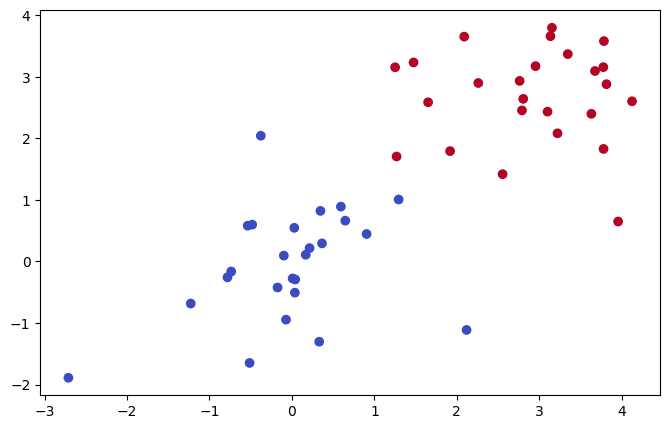

In [17]:
X[y==1] += 1.9;
_, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm);

In [18]:
svm_ = SVC(C=1e55, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y, y_hat)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


In [19]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



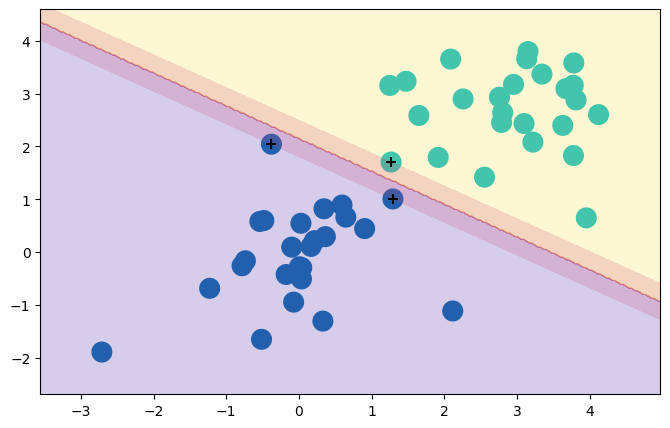

In [20]:
_, ax = plt.subplots(figsize=(8, 5))
plot_svm(X, y, svm_, ax=ax)

## Support vector machine

### Simulated data

In [21]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

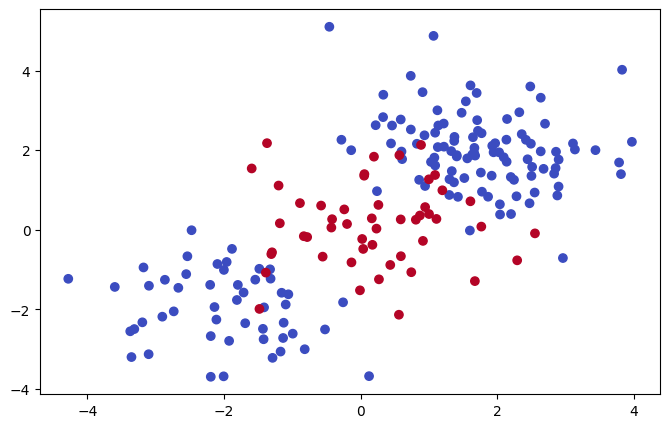

In [22]:
_, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=plt.cm.coolwarm);

### Train/test split

In [23]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 2), (100, 2), (100,), (100,))

### SVC with radial basis function (RBF)

The default `kernel` param is `rbf`, but we specify it here explicitly.

In [24]:
svm_rbf = SVC(gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

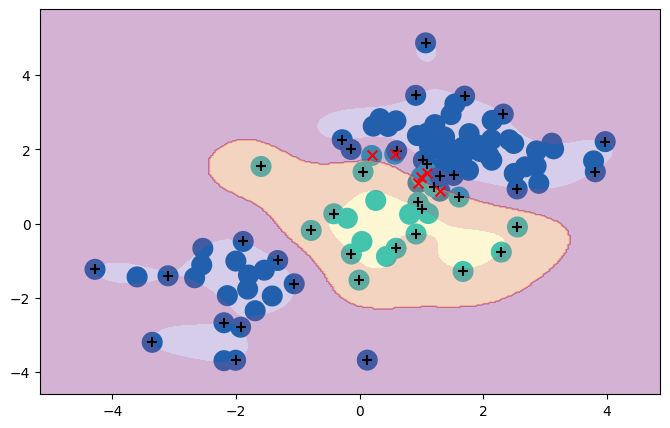

In [25]:
_, ax = plt.subplots(figsize=(8, 5))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

We increase `C` to `1e5` to reduce the training error at the risk of overfitting.

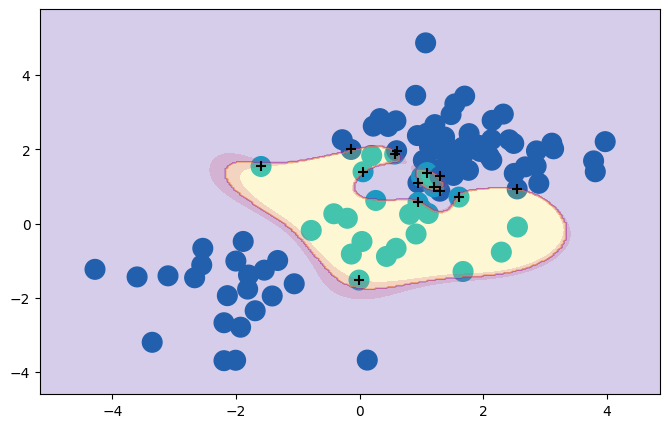

In [26]:
svm_rbf = SVC(gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)

_, ax = plt.subplots(figsize=(8, 5))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

### Tuning on C and gamma

In [27]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(
    svm_rbf,
    {
        'C':[0.1,1,10,100,1000],
        'gamma':[0.5,1,2,3,4]
    },
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

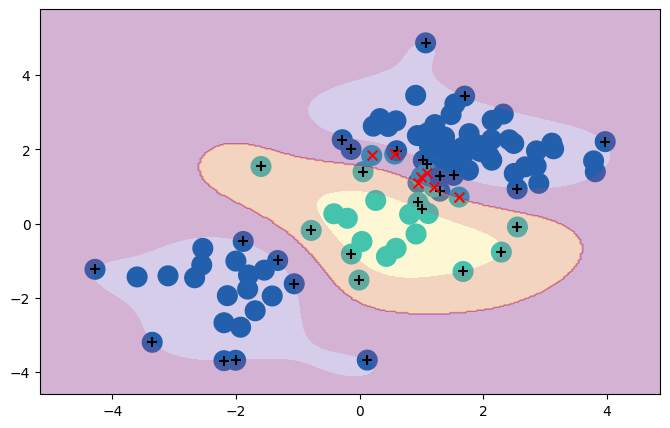

In [28]:
best_ = grid.best_estimator_
_, ax = plt.subplots(figsize=(8,5))
plot_svm(
    X_train,
    y_train,
    best_,
    ax=ax,
)

In [29]:
y_hat = best_.predict(X_test)
confusion_table(y_test, y_hat)

Truth,1,2
Predicted,,
1,69,6
2,6,19


In [30]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        75
           2       0.76      0.76      0.76        25

    accuracy                           0.88       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.88      0.88      0.88       100



## ROC curves

### Training AUC

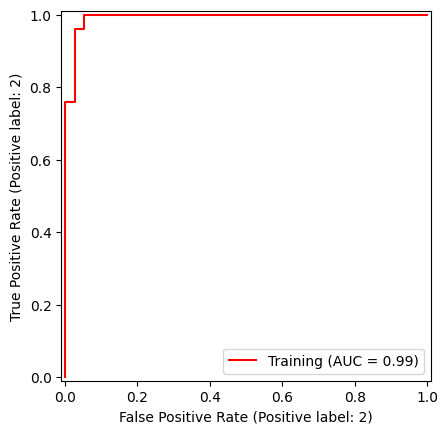

In [31]:
_, ax = plt.subplots()
roc_curve(
    best_,
    X_train,
    y_train,
    name='Training',
    color='r',
    ax=ax
);

### Training AUC high gamma

Training AUC with increased flexibility.

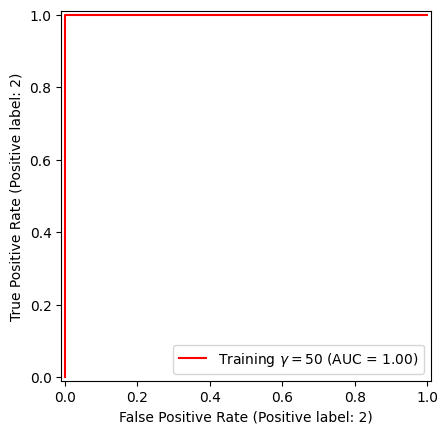

In [32]:
svm_flex = SVC(kernel="rbf", 
              gamma=50,
              C=1)
svm_flex.fit(X_train, y_train)
fig, ax = plt.subplots()
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax);

### Test AUC with high gamma

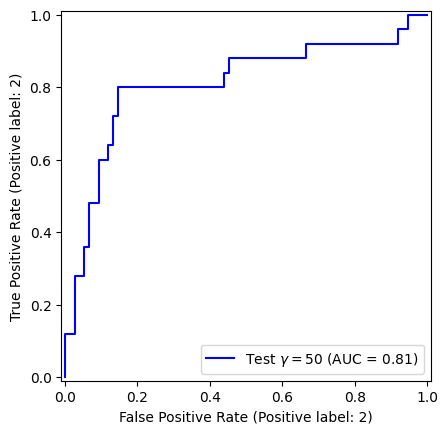

In [33]:
_, ax = plt.subplots()

roc_curve(svm_flex,
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax);

### Train/test AUC with tuned SVM

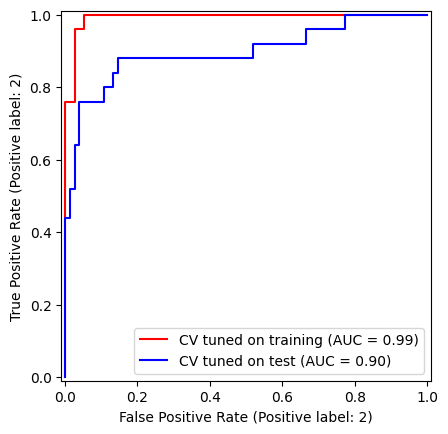

In [34]:
_, ax = plt.subplots()
for (X_, y_, c, name) in zip(
     (X_train, X_test),
     (y_train, y_test),
     ('r', 'b'),
     ('CV tuned on training',
      'CV tuned on test')
):
    roc_curve(best_, X_, y_, name=name, ax=ax, color=c)

## SVM with multiple classes

### Training data

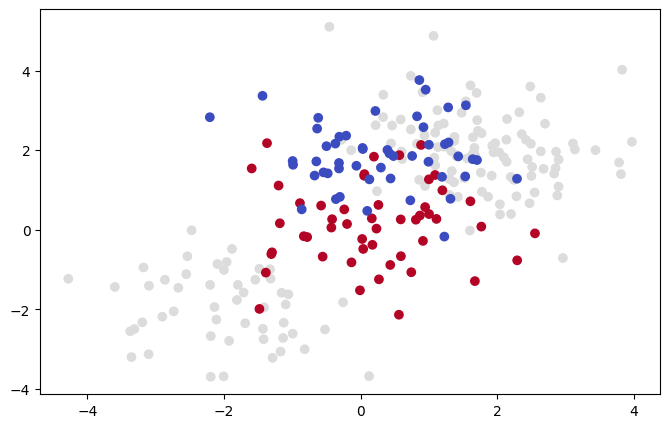

In [35]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm);

### SVM with OVO

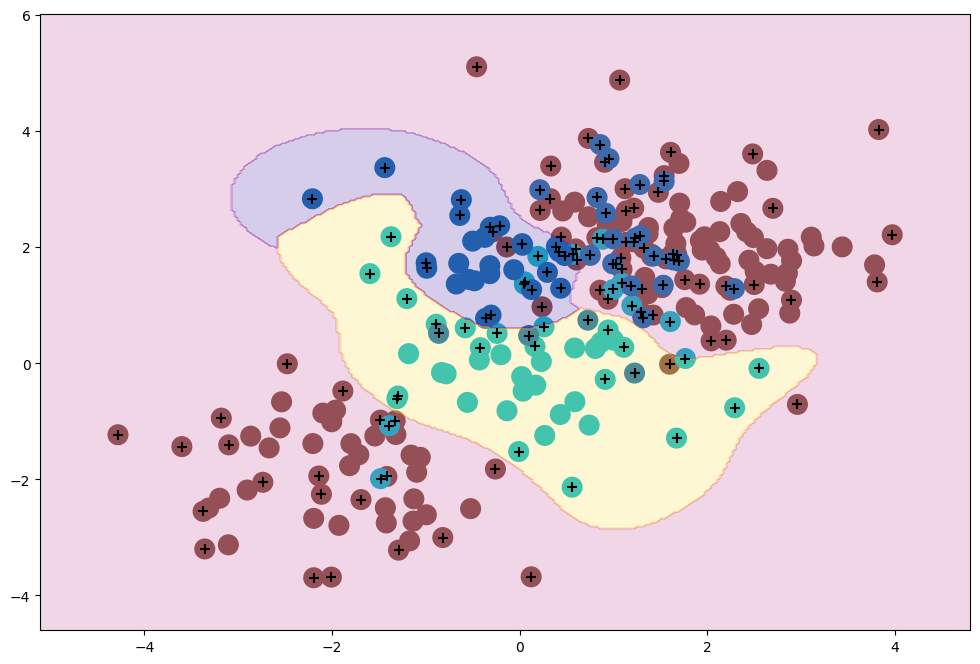

In [36]:
svm_rbf_3 = SVC(kernel="rbf",
                C=10,
                gamma=1,
                decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = plt.subplots(figsize=(12,8))
plot_svm(X,
         y,
         svm_rbf_3,
         scatter_cmap=plt.cm.tab10,
         ax=ax);

## Applications to gene expression data

In [37]:
Khan = load_data('Khan')
X_train, X_test, y_train, y_test = Khan['xtrain'], Khan['xtest'], Khan['ytrain'], Khan['ytest']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63, 2308), (20, 2308), (63,), (20,))

### Performance on training data

In [38]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [39]:
y_hat = khan_linear.predict(X_train)
confusion_table(y_train, y_hat)

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [40]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        20

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### Performance on test data

In [41]:
y_hat = khan_linear.predict(X_test)
confusion_table(y_test, y_hat)

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


In [42]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         6
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.92      0.91        20
weighted avg       0.93      0.90      0.90        20

